# Assingment: Linear and Logistic Regression
----------------------------------------------------------

# I. Business Understanding
Real estate pricing is essential for buyers, sellers, investors, and agencies, as it directly impacts decision-making in property valuation and investment planning. To gain better insights into market trends, this project applies linear and logistic regression models to analyze a real estate dataset and predict property prices based on key features.

In this assignment we construct two models:

- Linear Regression model: Predicts the continuous target variable to estimate real estate prices.
- Logistic Regression mode: Converts the target variable into a binary classification and predicts whether a house price falls into the higher or lower category.

### Our Goals
* To predict real estate prices using linear regression.
* To classify real estate prices into higher or lower categories using logistic regression.
* Identify Key Factors Influencing Prices – Analyze feature importance to determine which attributes have the most significant impact on property values.

### Our Objectives
* to learn to use linear regression for predicting continuously varying target variables
* to learn to use logistic regression for binary classification
* to learn to estimate the relative importance of input features

# II. Data Understanding
The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. The dataset includes six input variables and one output variable. The input variables are as follows:

Additional Variable Information

The inputs are as follows
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
- Y = house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

Data Source: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set

# III. Data Preparation
The data preparation process includes the following steps:
- Load the dataset
- Scale the data
- Split the data into training and testing sets

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


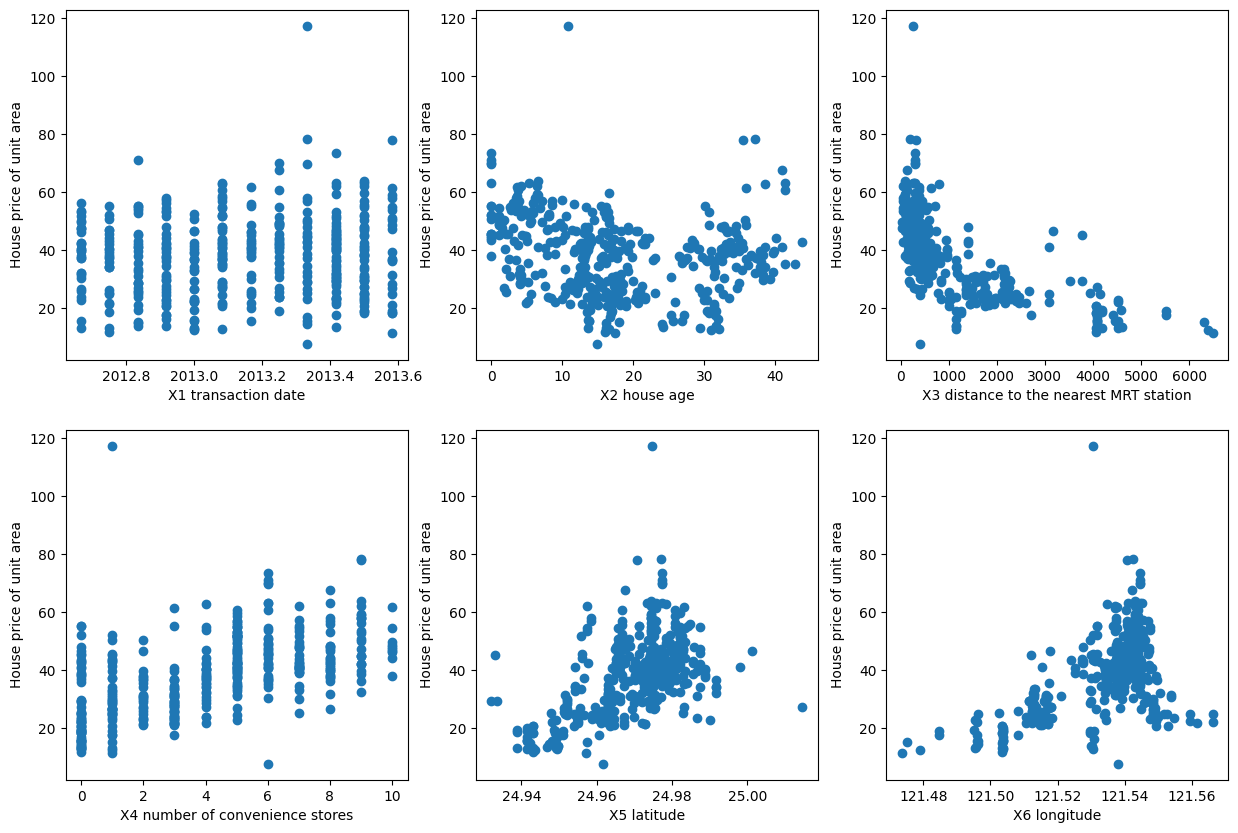

In [18]:
# check relationships between columns and price

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for index, column in enumerate(X.columns):
    axes[index].scatter(X[column], y)
    axes[index].set_xlabel(column)
    axes[index].set_ylabel('House price of unit area')

From the data I can see that there an exponential corealtion between the house price of unit area and the distance to the nearest MRT station. Also I can see that linear corealtion between the house price of unit area and the number of convenience stores in the living circle on foot, mostly if house has the most convenience stores nearby it affects the price positively. By Longitude I can only say that 121.54 longitude has the highest house price of unit area and the most houses are sold in that area. There is a linear but not too strong corealtion between the house price of unit area and the house age as the house age increases the house price of unit area decreases. (@Jafestro)

# IV-i. Modeling (Linear Regression)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# V-i. Evaluation (Linear Regression)

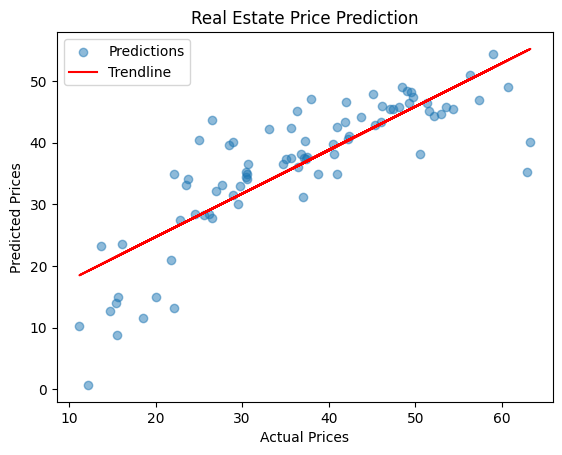

Root Mean Squared Error (RMSE): 7.31
R² Score: 0.68


In [20]:
plt.scatter(y_test, y_pred, label="Predictions", alpha=0.5)

# Fit a trendline (linear fit)
m, b = np.polyfit(y_test.values.flatten(), y_pred.flatten(), 1)
plt.plot(y_test, m * y_test + b, color='red', label="Trendline")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Real Estate Price Prediction")
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# IV-ii. Modeling (Logistic Regression)

In [21]:
import matplotlib.pyplot as plt


mean_price = y_train.mean().values[0]

y_train_binary = (y_train > mean_price).astype(int)
y_test_binary = (y_test > mean_price).astype(int)

y_train_binary_flat = y_train_binary.values.ravel()
y_test_binary_flat = y_test_binary.values.ravel()

log_model = LogisticRegression()
log_model.fit(X_train, y_train_binary_flat)


LogisticRegression()

# V-ii. Evaluation (Logistic Regression)

Confusion Matrix:
[[36 12]
 [ 3 32]]


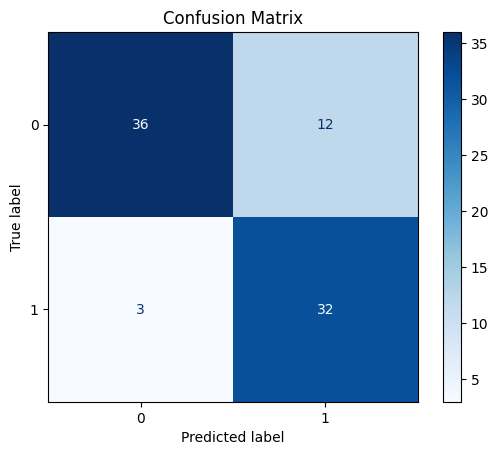

Mean house price (threshold): 38.39
Accuracy: 0.82
Coefficients: [[ 0.23214581 -0.61188582 -2.38300698  0.55330495  0.9400307  -0.13234689]]
Intercept: [-0.62572427]


In [22]:
y_pred_binary = log_model.predict(X_test)

accuracy = accuracy_score(y_test_binary_flat, y_pred_binary)

cm = confusion_matrix(y_test_binary_flat, y_pred_binary)
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print(f"Mean house price (threshold): {mean_price:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Coefficients: {log_model.coef_}")
print(f"Intercept: {log_model.intercept_}")

# VI. Deployment

### Conclusion
The linear regression model predicts real estate prices based on key features, while the logistic regression model classifies prices into higher or lower categories. The models provide valuable insights into market trends and help buyers, sellers, investors, and agencies make informed decisions in property valuation and investment planning.

#### Findings

- The house prices have a strong correalation with the distance to the nearest MRT station.
- The number of convenience stores in the living circle on foot, longitude and latitude. Maybe at that point which crosses those high peak longitude and latitude is the most popular part.
- The house age has a weak corelation with the house price of unit area.
- The less important feature is the transaction date when predicting the house price of unit area.



